In [138]:
% matplotlib inline
import matplotlib.pyplot as plt
import math
from IPython.html.widgets import interact
from __future__ import division

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [38]:
logistic_map = lambda x, r: r * x * (1 - x)

In [87]:
def iterate_N(f, x, N):
    a = [x]
    for i in range(N-1):
        a.append(f(a[-1]))
    return a

<div class="alert alert-info">
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [95]:
map(lambda r: iterate_N(lambda x: logistic_map(x, r), .5, 5), [.8, 1.2, 2.8, 3.2])

[[0.5, 0.2, 0.12800000000000003, 0.08929280000000003, 0.06505567669452801],
 [0.5, 0.3, 0.252, 0.2261952, 0.21003711779635198],
 [0.5, 0.7, 0.588, 0.6783168, 0.6109687327457278],
 [0.5, 0.8, 0.512, 0.7995392, 0.512884056522752]]

<div class="alert alert-info">
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

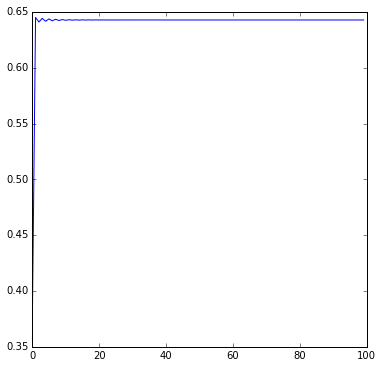

In [146]:
def plot_logistic_map(r, x, N = 100):
    v = iterate_N(lambda x: logistic_map(x, r), x, N)
    plt.figure(figsize = (6,6))
    plt.plot(range(N), v)
    plt.show()

interact(plot_logistic_map, r = (0, 10, .01), x = (0, 1, .01), N = (100, 200));

<div class="alert alert-info">
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

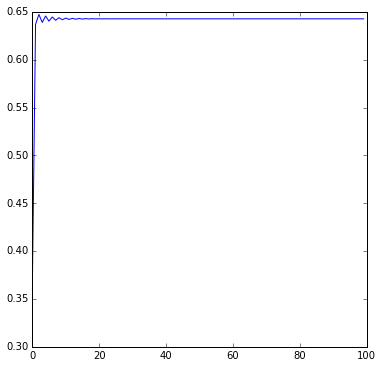

In [90]:
plot_logistic_map(2.8, .35)

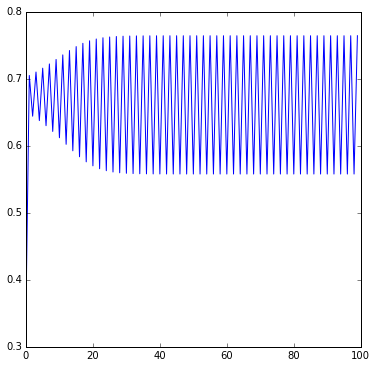

In [91]:
plot_logistic_map(3.1, .35)

Es evidente que eligió los valores para mostrar que un mismo valor puede divergir o convergir con distintas r.

## Diagrama de Cobweb

In [131]:
def cobweb_diagram(f, x, N = 100):
    plt.figure(figsize = (6,6))
    
    steps = 1000
    xs = [i/steps for i in range(steps)]
    fxs = map(f, xs)
    v = iterate_N(f, x, N)
    
    plt.plot(xs, xs)
    plt.plot(xs, fxs)
    
    plt.plot([x, x], [0, x], lw=1.0, color='black') # se ve más bonito
    
    for i in range(N-1):
        plt.plot([v[i], v[i]], [v[i], v[i+1]], lw=1.0, color='black')
        plt.plot([v[i], v[i+1]], [v[i+1], v[i+1]], lw=1.0, color='black')
      
    plt.show()

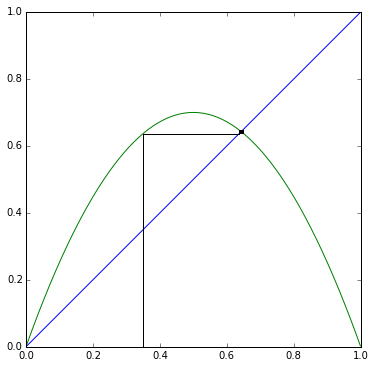

In [136]:
cobweb_diagram(lambda x: logistic_map(x, 2.8), .35, 1000)

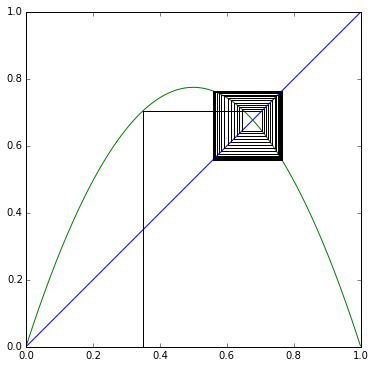

In [135]:
cobweb_diagram(lambda x: logistic_map(x, 3.1), .35, 1000)